In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [27]:
X_train_n = X_train/X_train.max()
X_test_n = X_test/X_test.max()

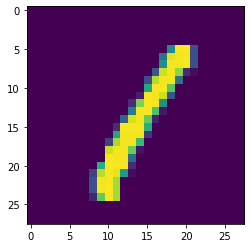

In [11]:
plt.imshow(X_train_n[3])
plt.show()

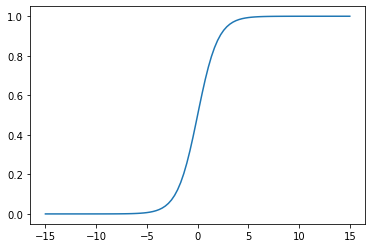

In [17]:
# sigmoid
x = np.linspace(-15, 15, 100)
y = 1 / (1 + np.exp(-x))
plt.plot(x, y)
plt.show()

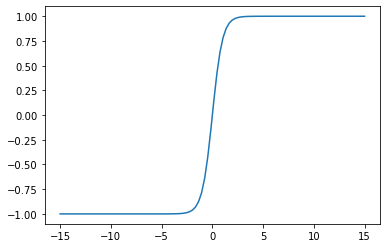

In [19]:
y = np.tanh(x)
plt.plot(x, y)
plt.show()

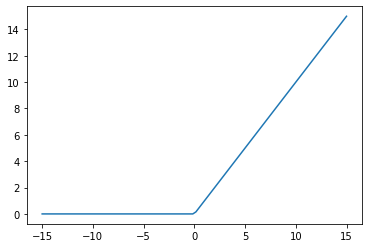

In [21]:
#ReLU
y = [max(0, i) for i in x]
plt.plot(x, y)
plt.show()

In [24]:
model = tf.keras.models.Sequential()

# input layer
model.add(tf.keras.layers.Flatten(input_shape=(X_train_n.shape[1:])))

# 2 hidden layer
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(16, activation="relu"))

# output layer
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(optimizer="adam", metrics=['accuracy'], loss="sparse_categorical_crossentropy")


In [25]:
model.fit(X_train_n, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4308 - accuracy: 0.8738
Epoch 2/3
1875/1875 [==============================] - 2s 990us/step - loss: 0.2457 - accuracy: 0.9281
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2054 - accuracy: 0.9407


In [26]:
val_loss, val_acc = model.evaluate(X_test_n, y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 0s 1ms/step - loss: 34.7199 - accuracy: 0.9333
34.71987533569336
0.9333000183105469


[0.0000000e+00 0.0000000e+00 3.0918651e-34 0.0000000e+00 0.0000000e+00
 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
6


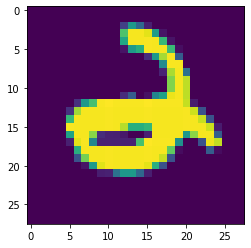

In [52]:
y_pred = model.predict(X_test)

# n = np.random.randint(0, 1e4+1)
print(y_pred[7945])
print(np.argmax((y_pred[7945])))
# print(n)
plt.imshow(X_test[7945])
plt.show()